In [32]:
import sklearn 
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [2]:
df_dreams = pd.read_csv('data/rsos_dream_data.csv')
df_dreams.head(8)
df_dreams.shape

(21001, 21)

In [3]:
df_dreams = df_dreams[['text_dream','emotions_code']].dropna()

In [4]:
df_dreams['text_dream'] = df_dreams['text_dream'].str.lower()

In [5]:
df_dreams.head(8)

,text_dream,emotions_code
1,i'm at a family reunion in a large fine house ...,SD 2IKA
2,i watch a plane fly past and shortly realize i...,"SD 1ISA, AP D, AP D"
3,me pulling the green leaves and berries off so...,"SD 2ISA, SD D"
4,i'm in a room that reminds me of (but definite...,"AP D, AP D, AP 1MSA, CO D, SD D, AP D"
5,living next door to loretta in an apartment - ...,HA 1FSA
6,kidnapped - i'm on my way somewhere else (by c...,"AN 1ISA, AN D, SD 2ISA, AN D"
7,"i'm alone in an apartment - old place, inside ...","AP D, SD D"
11,me and mb (one of my cats) in a big fancy dark...,"AP 1ISA, SD 2ISA, AP 1IKA"


In [6]:
df_dreams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11086 entries, 1 to 20999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text_dream     11086 non-null  object
 1   emotions_code  11086 non-null  object
dtypes: object(2)
memory usage: 259.8+ KB


#### Splitting emotions_code column to keep only the first emotion code.

In [7]:
df_dreams["emotion_code"] = df_dreams['emotions_code'].str.split(" ", n = 1, expand = True)[0]

In [8]:
df_dreams["emotion_code"].value_counts()

AP             3503
HA             2161
AN             2117
CO             1682
SD             1612
AP1IKA,           2
CO1IKA,           2
AP1IKA            2
MAN1MKA           1
CO1IKA            1
WOMAN2IDA         1
INDIAN1IEA        1
REAGAN1IKA,       1
Name: emotion_code, dtype: int64

In [9]:
df_dreams.shape

(11086, 3)

In [10]:
target_codes = ["AP", "HA", "AN", "CO", "SD"]

df_dreams = df_dreams[df_dreams['emotion_code'].isin(target_codes)]

In [11]:
categories = {
    'AP': 'Apprehension',
    'HA': 'Happiness',
    'AN': 'Anger',
    'CO': 'Confusion',
    'SD': 'Sadness'
}

print(categories)

{'AP': 'Apprehension', 'HA': 'Happiness', 'AN': 'Anger', 'CO': 'Confusion', 'SD': 'Sadness'}


In [12]:
df_dreams.shape

(11075, 3)

In [13]:
X = df_dreams['text_dream'].to_list()
y = df_dreams['emotion_code'].to_list()

In [14]:
type(X), len(X)

(list, 11075)

In [15]:
len(X),len(y)

(11075, 11075)

In [16]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
print("X_train shape: {}" .format(len(X_train)))
print("y_train shape: {}" .format(len(y_train)))

X_train shape: 8860
y_train shape: 8860


In [18]:
print("X_test shape: {}" .format(len(X_test)))
print("y_test shape: {}" .format(len(y_test)))

X_test shape: 2215
y_test shape: 2215


### Tokenizing text with scikit-learn

### Term frequencies

### Training a classifier

#### Building a pipeline

# TODO:

* restart your kernel
* load your data etc
* instead of the above steps for vectorixzatoin and tfidf and training, use a pipeline to do the same, then delete the above steps
* evaluate your performance on your test set
* is the performance good? probably no, use confusion matrix for your classifier as well
* run grid search to improve your model


In [19]:
text_clf = Pipeline([
    ('vect', CountVectorizer(lowercase=True, stop_words="english", strip_accents='unicode', ngram_range=(1,2))),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier(n_jobs=-1)),
])

In [20]:
text_clf.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(ngram_range=(1, 2), stop_words='english',
                                 strip_accents='unicode')),
                ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier(n_jobs=-1))])

### Evaluating performance of test set

In [24]:
y_pred = text_clf.predict(X_test)
np.mean(predicted == y_test)

0.49435665914221216

### Confusion matrix

In [28]:
cm = confusion_matrix(y_test,y_pred, labels=text_clf.classes_)
cm

array([[202, 209,   4,  11,   6],
       [ 11, 640,   5,  14,   3],
       [ 21, 234,  75,  17,   4],
       [ 21, 268,   7, 139,   3],
       [ 19, 241,   8,  14,  39]])

### Plot confusion matrix

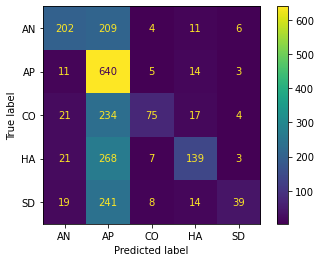

In [30]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=text_clf.classes_)
disp.plot()

plt.show()

### Classification report

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          AN       0.74      0.47      0.57       432
          AP       0.40      0.95      0.57       673
          CO       0.76      0.21      0.33       351
          HA       0.71      0.32      0.44       438
          SD       0.71      0.12      0.21       321

    accuracy                           0.49      2215
   macro avg       0.66      0.41      0.42      2215
weighted avg       0.63      0.49      0.45      2215



### Parameter tuning with grid search

In [40]:
param_grid = {
    'clf__n_estimators': [50, 100, 200, 500],
    'clf__max_features': [2, 4, 6, 8],
}

In [41]:
gs_clf = GridSearchCV(text_clf, param_grid, cv=5, n_jobs=-1)

In [42]:
gs_clf = gs_clf.fit(X_train[:500], y_train[:500])

In [48]:
y_train[gs_clf.predict([['being chased']])]


AttributeError: 'list' object has no attribute 'lower'

In [49]:
print("Best parameter (CV score=%0.3f):" % gs_clf.best_score_)
print(gs_clf.best_params_)

Best parameter (CV score=0.362):
{'clf__max_features': 6, 'clf__n_estimators': 50}
